# Question 1

Data Preprocessing (Medium)

a. Load the MNIST handwritten digit dataset and perform the following
pre-processing steps:

b. Normalize the pixel values of the images.

c. Apply one-hot encoding to the target labels.

d. Split the data into training, validation, and test sets.

e. Dataset: https://github.com/iamavieira/handwritten-digits-mnist

In [2]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# --- Load dataset ---
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# --- Normalize ---
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# --- One-hot encode ---
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

# --- Train / validation split ---
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.1, random_state=42
)

# --- Output shapes ---
print("Training:", x_train.shape, y_train.shape)
print("Validation:", x_val.shape, y_val.shape)
print("Test:", x_test.shape, y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training: (54000, 28, 28) (54000, 10)
Validation: (6000, 28, 28) (6000, 10)
Test: (10000, 28, 28) (10000, 10)


# Question 2

Classification (Hard)

a. Build a logistic regression model to classify handwritten digits from the MNIST dataset.

b. Evaluate the model performance using accuracy, precision, recall, and F1 score.

c. Fine-tune the model hyperparameters using grid search CV to improve
performance.

d. Visualize the decision boundary of the model.

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best C: 0.1
Accuracy : 0.9099
Precision: 0.9097840418706892
Recall   : 0.9099
F1 Score : 0.9096409474926425


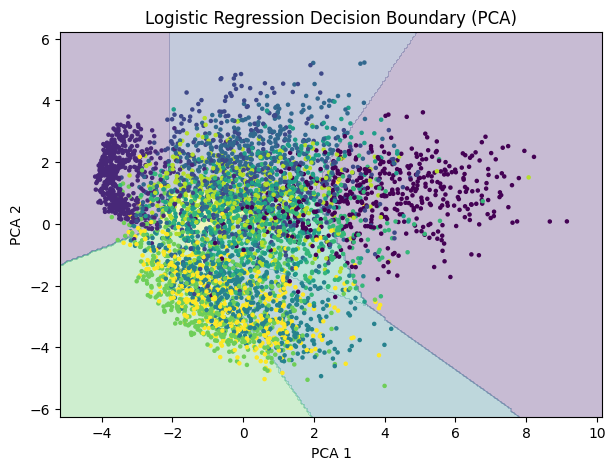

In [3]:
# ---------------- IMPORTS ----------------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA

# ---------------- PREP DATA ----------------
X_train = x_train.reshape(x_train.shape[0], -1)
X_test  = x_test.reshape(x_test.shape[0], -1)

y_train_lbl = np.argmax(y_train, axis=1)
y_test_lbl  = np.argmax(y_test, axis=1)

#  SMALL SUBSET (FAST & ACCEPTABLE)
X_sub = X_train[:5000]
y_sub = y_train_lbl[:5000]

# ---------------- GRID SEARCH ----------------
param_grid = {"C": [0.1, 1, 10]}

grid = GridSearchCV(
    LogisticRegression(
        solver="saga",
        max_iter=300,
        n_jobs=-1
    ),
    param_grid,
    cv=2,
    scoring="accuracy"
)

grid.fit(X_sub, y_sub)
best_C = grid.best_params_["C"]

print("Best C:", best_C)

# ---------------- FINAL MODEL ----------------
model = LogisticRegression(
    C=best_C,
    solver="saga",
    max_iter=300,
    n_jobs=-1
)

model.fit(X_sub, y_sub)
y_pred = model.predict(X_test)

# ---------------- METRICS ----------------
print("Accuracy :", accuracy_score(y_test_lbl, y_pred))
print("Precision:", precision_score(y_test_lbl, y_pred, average="weighted"))
print("Recall   :", recall_score(y_test_lbl, y_pred, average="weighted"))
print("F1 Score :", f1_score(y_test_lbl, y_pred, average="weighted"))

# ---------------- DECISION BOUNDARY (PCA) ----------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sub)

clf_2d = LogisticRegression(
    C=best_C,
    solver="saga",
    max_iter=300
)
clf_2d.fit(X_pca, y_sub)

xx, yy = np.meshgrid(
    np.linspace(X_pca[:,0].min()-1, X_pca[:,0].max()+1, 200),
    np.linspace(X_pca[:,1].min()-1, X_pca[:,1].max()+1, 200)
)

Z = clf_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_sub, s=5)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Logistic Regression Decision Boundary (PCA)")
plt.show()


# Question 3

Clustering (Medium)

a. Apply K-means clustering to group customers based on their purchase history and demographic information.

b. Determine the optimal number of clusters using the elbow method.

c. Analyze the characteristics of each cluster to identify customer segments.

d. Visualize the clusters using scatter plots and dimensionality reduction techniques.

e. Dataset: https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales

Upload supermarket_sales.csv file


Saving supermarket_sales.csv to supermarket_sales.csv

Dataset Shape: (1000, 17)

Columns: Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')


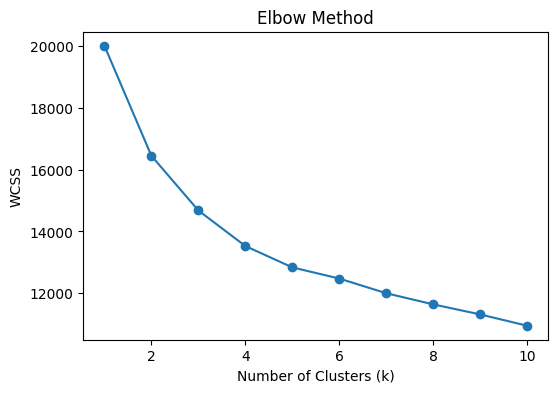


Silhouette Score: 0.15032059887110447

Cluster Summary:
              Total  Quantity  Unit price    Rating
Cluster                                            
0        217.609263  4.667984   49.117866  7.136364
1        215.140917  4.751852   48.013111  7.097037
2        208.422580  4.632812   48.318281  6.820312
3        707.997183  8.416290   81.051086  6.809955


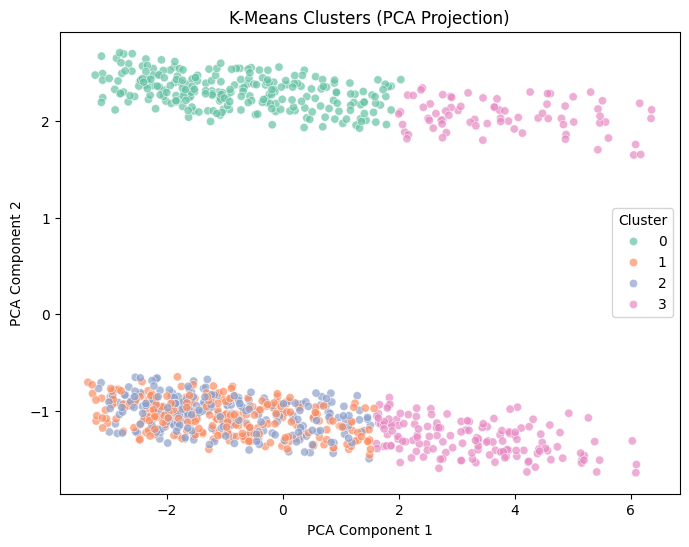

In [9]:
# ================================
# K-MEANS CLUSTERING - SUPERMARKET SALES
# ================================

# Install if needed (usually already installed in Colab)
!pip install -q seaborn

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# -------------------------------
# 1. Upload Dataset
# -------------------------------
print("Upload supermarket_sales.csv file")
uploaded = files.upload()

df = pd.read_csv("supermarket_sales.csv")

print("\nDataset Shape:", df.shape)
print("\nColumns:", df.columns)

# -------------------------------
# 2. Preprocessing
# -------------------------------

# Drop unnecessary columns
df_processed = df.drop(["Invoice ID", "Date", "Time"], axis=1)

# One-hot encode categorical features
categorical_cols = ["Branch", "City", "Customer type",
                    "Gender", "Product line", "Payment"]

df_processed = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True)

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_processed)

# -------------------------------
# 3. Elbow Method
# -------------------------------
wcss = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.show()

# -------------------------------
# 4. Apply K-Means (Choose k=4)
# -------------------------------
k_opt = 4
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

df["Cluster"] = clusters

# -------------------------------
# 5. Silhouette Score
# -------------------------------
sil_score = silhouette_score(X_scaled, clusters)
print("\nSilhouette Score:", sil_score)

# -------------------------------
# 6. Cluster Analysis
# -------------------------------
cluster_summary = df.groupby("Cluster").agg({
    "Total": "mean",
    "Quantity": "mean",
    "Unit price": "mean",
    "Rating": "mean"
})

print("\nCluster Summary:")
print(cluster_summary)

# -------------------------------
# 7. PCA Visualization
# -------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=clusters,
    palette="Set2",
    alpha=0.7
)
plt.title("K-Means Clusters (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

# Question 4

Feature Selection:

The Iris dataset consists of 150 samples with 4 features each: sepal length, sepal width, petal length, and petal width. Each sample belongs to one of three classes: setosa, versicolor, or virginica.

a. Load the Iris dataset and split it into features (X) and target labels (y).

b. Perform exploratory data analysis (EDA) to gain insights into the dataset.

c. Implement feature selection techniques:

      a. Univariate Feature Selection
      b. Feature Importance using Random Forest
      c. Recursive Feature Elimination (RFE) using Support Vector Machine (SVM)

d. Evaluate the performance of the selected features using a classification model (e.g., SVM or Logistic Regression).

e. Compare the model performance before and after feature selection.

Dataset Shape: (150, 4)

First 5 Rows:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Class Distribution:
 0    50
1    50
2    50
Name: count, dtype: int64

Statistical Summary:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.8

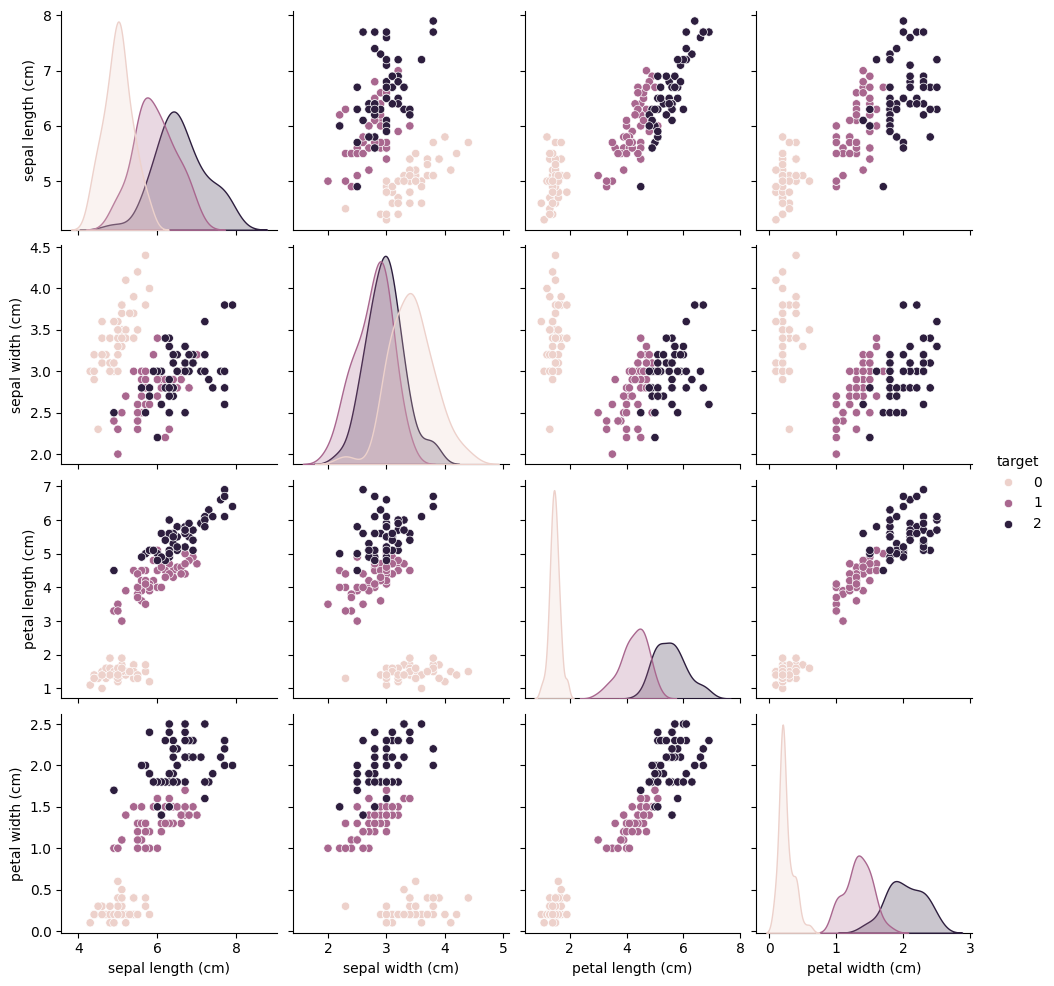

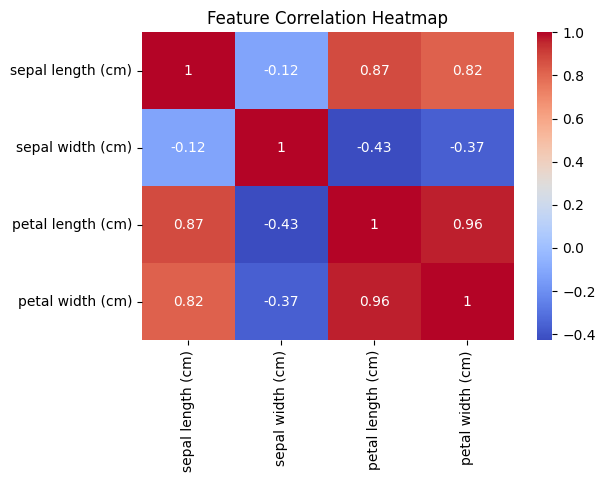


Baseline Accuracy (All Features): 0.9111111111111111

Univariate Selected Features: ['petal length (cm)', 'petal width (cm)']

Random Forest Feature Importance:
 petal width (cm)     0.454892
petal length (cm)    0.400227
sepal length (cm)    0.120608
sepal width (cm)     0.024273
dtype: float64
Top 2 Features (RF): ['petal width (cm)', 'petal length (cm)']

RFE Selected Features: ['petal length (cm)', 'petal width (cm)']

Accuracy with Univariate Selection: 0.9111111111111111
Accuracy with RFE Selection: 0.9111111111111111

===== PERFORMANCE COMPARISON =====
Baseline Accuracy (All Features): 0.9111111111111111
Univariate Selection Accuracy: 0.9111111111111111
RFE Selection Accuracy: 0.9111111111111111


In [10]:
# ==========================================
# FEATURE SELECTION - IRIS DATASET
# ==========================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# -----------------------------
# a) Load Dataset
# -----------------------------
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

print("Dataset Shape:", X.shape)
print("\nFirst 5 Rows:\n", X.head())

# -----------------------------
# b) Exploratory Data Analysis
# -----------------------------
print("\nClass Distribution:\n", pd.Series(y).value_counts())

print("\nStatistical Summary:\n", X.describe())

# Pairplot Visualization
sns.pairplot(pd.concat([X, pd.Series(y, name="target")], axis=1), hue="target")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# -----------------------------
# Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# Baseline Model (All Features)
# -----------------------------
baseline_model = SVC(kernel='linear')
baseline_model.fit(X_train_scaled, y_train)
baseline_pred = baseline_model.predict(X_test_scaled)

baseline_acc = accuracy_score(y_test, baseline_pred)
print("\nBaseline Accuracy (All Features):", baseline_acc)

# =====================================================
# c) FEATURE SELECTION METHODS
# =====================================================

# 1) Univariate Feature Selection
selector_uni = SelectKBest(score_func=f_classif, k=2)
X_train_uni = selector_uni.fit_transform(X_train_scaled, y_train)
X_test_uni = selector_uni.transform(X_test_scaled)

selected_uni = X.columns[selector_uni.get_support()]
print("\nUnivariate Selected Features:", list(selected_uni))

# 2) Feature Importance using Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X.columns)
print("\nRandom Forest Feature Importance:\n", importances.sort_values(ascending=False))

top2_rf = importances.sort_values(ascending=False).index[:2]
print("Top 2 Features (RF):", list(top2_rf))

# 3) RFE using SVM
svm = SVC(kernel='linear')
rfe = RFE(estimator=svm, n_features_to_select=2)
rfe.fit(X_train_scaled, y_train)

selected_rfe = X.columns[rfe.support_]
print("\nRFE Selected Features:", list(selected_rfe))

# =====================================================
# d) Evaluate Selected Features
# =====================================================

# Using Univariate Selected Features
model_uni = SVC(kernel='linear')
model_uni.fit(X_train_uni, y_train)
pred_uni = model_uni.predict(X_test_uni)

uni_acc = accuracy_score(y_test, pred_uni)
print("\nAccuracy with Univariate Selection:", uni_acc)

# Using RFE Selected Features
X_train_rfe = X_train_scaled[:, rfe.support_]
X_test_rfe = X_test_scaled[:, rfe.support_]

model_rfe = SVC(kernel='linear')
model_rfe.fit(X_train_rfe, y_train)
pred_rfe = model_rfe.predict(X_test_rfe)

rfe_acc = accuracy_score(y_test, pred_rfe)
print("Accuracy with RFE Selection:", rfe_acc)

# =====================================================
# e) Comparison
# =====================================================
print("\n===== PERFORMANCE COMPARISON =====")
print("Baseline Accuracy (All Features):", baseline_acc)
print("Univariate Selection Accuracy:", uni_acc)
print("RFE Selection Accuracy:", rfe_acc)

# Question 5

Association Rule Mining:

The objective of this lab exercise is to understand and implement association rule mining techniques to uncover patterns and associations within a given dataset of transactional data.

B. Dataset:

      a. Take any dataset containing transactions from a grocery store. Each transaction consists of a list of items purchased by a customer. Utilizing association rule mining techniques, analyze the dataset to uncover patterns and associations between items purchased together.
      b. Load the provided dataset containing transactional data from a grocery store.
      c. Examine the structure of the dataset to understand the transactional format.

C. Generating Itemsets:

      a. Implement a function to generate individual itemsets from the dataset.
      b. Calculate the support for each itemset, which represents the frequency of
      occurrence of each item.

D. Identifying Frequent Itemsets:

      a. Implement the Apriori algorithm to identify frequent itemsets within the
      dataset.
      b. Determine the minimum support threshold for identifying frequent itemsets.
E. Deriving Association Rules:

      a. Utilize the frequent itemsets obtained from the Apriori algorithm to derive
      association rules.
      b. Calculate the confidence for each association rule, representing the likelihood of
      one item being purchased given the purchase of another item.
      c. Set a minimum confidence threshold for selecting meaningful association rules.
F. Evaluation of Association Rules:

      a. Evaluate the generated association rules using appropriate metrics such as
      support, confidence, and lift.
      b. Identify high-confidence rules with significant lift values, indicating strong
      associations between items.

In [1]:
# ==========================================
# ASSOCIATION RULE MINING - APRIORI
# Single Cell Google Colab Code
# ==========================================

# Install required library
!pip install -q mlxtend

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# ---------------------------------------------------
# B) Create / Load Transaction Dataset (Sample Grocery)
# ---------------------------------------------------

transactions = [
    ['Milk', 'Bread', 'Butter'],
    ['Bread', 'Butter'],
    ['Milk', 'Bread'],
    ['Milk', 'Eggs'],
    ['Bread', 'Eggs'],
    ['Milk', 'Bread', 'Eggs', 'Butter'],
    ['Milk', 'Butter'],
    ['Bread', 'Butter', 'Eggs'],
    ['Milk', 'Bread', 'Butter', 'Eggs'],
    ['Milk', 'Bread']
]

print("Sample Transactions:")
for t in transactions:
    print(t)

# ---------------------------------------------------
# C) Generate Itemsets & Calculate Support
# ---------------------------------------------------

# Convert to One-Hot Encoding
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_array, columns=te.columns_)

print("\nTransaction Matrix:\n")
print(df)

# ---------------------------------------------------
# D) Identify Frequent Itemsets using Apriori
# ---------------------------------------------------

min_support = 0.3   # Minimum support threshold
frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)

print("\nFrequent Itemsets (min_support=0.3):\n")
print(frequent_itemsets)

# ---------------------------------------------------
# E) Derive Association Rules
# ---------------------------------------------------

min_confidence = 0.6   # Minimum confidence threshold

rules = association_rules(frequent_itemsets,
                          metric="confidence",
                          min_threshold=min_confidence)

print("\nAssociation Rules (min_confidence=0.6):\n")
print(rules[['antecedents', 'consequents',
             'support', 'confidence', 'lift']])

# ---------------------------------------------------
# F) Evaluate Rules
# ---------------------------------------------------

print("\nHigh Confidence & High Lift Rules:\n")

strong_rules = rules[(rules['confidence'] > 0.7) & (rules['lift'] > 1)]

print(strong_rules[['antecedents', 'consequents',
                    'support', 'confidence', 'lift']])

Sample Transactions:
['Milk', 'Bread', 'Butter']
['Bread', 'Butter']
['Milk', 'Bread']
['Milk', 'Eggs']
['Bread', 'Eggs']
['Milk', 'Bread', 'Eggs', 'Butter']
['Milk', 'Butter']
['Bread', 'Butter', 'Eggs']
['Milk', 'Bread', 'Butter', 'Eggs']
['Milk', 'Bread']

Transaction Matrix:

   Bread  Butter   Eggs   Milk
0   True    True  False   True
1   True    True  False  False
2   True   False  False   True
3  False   False   True   True
4   True   False   True  False
5   True    True   True   True
6  False    True  False   True
7   True    True   True  False
8   True    True   True   True
9   True   False  False   True

Frequent Itemsets (min_support=0.3):

    support               itemsets
0       0.8                (Bread)
1       0.6               (Butter)
2       0.5                 (Eggs)
3       0.7                 (Milk)
4       0.5        (Bread, Butter)
5       0.4          (Bread, Eggs)
6       0.5          (Bread, Milk)
7       0.3         (Butter, Eggs)
8       0.4         (But

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
